In [29]:
import findspark
findspark.init('/home/navin/spark-2.4.6-bin-hadoop2.7')

In [33]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('demo').getOrCreate()
sc=spark.sparkContext

In [31]:
spark

## Immutability
PySpark RDDs are immutable in nature meaning, once RDDs are created you cannot modify them. When we apply transformations on RDD, PySpark creates a new RDD and maintains the RDD Lineage.

## RDD Partitions
When we use parallelize(), textFile() or wholeTextFiles() methods of SparkContxt to initiate RDD, it automatically splits the data into partitions based on resource availability. When you run it on a laptop, it creates partitions as the same number of cores available on your system

### Set partitions manually
`sparkContext.parallelize([1,2,3,4,56,7,8,9,12,3], 10)` - 10 partition will create

## Ref
[RDD - tutorial](https://sparkbyexamples.com/pyspark-rdd/)

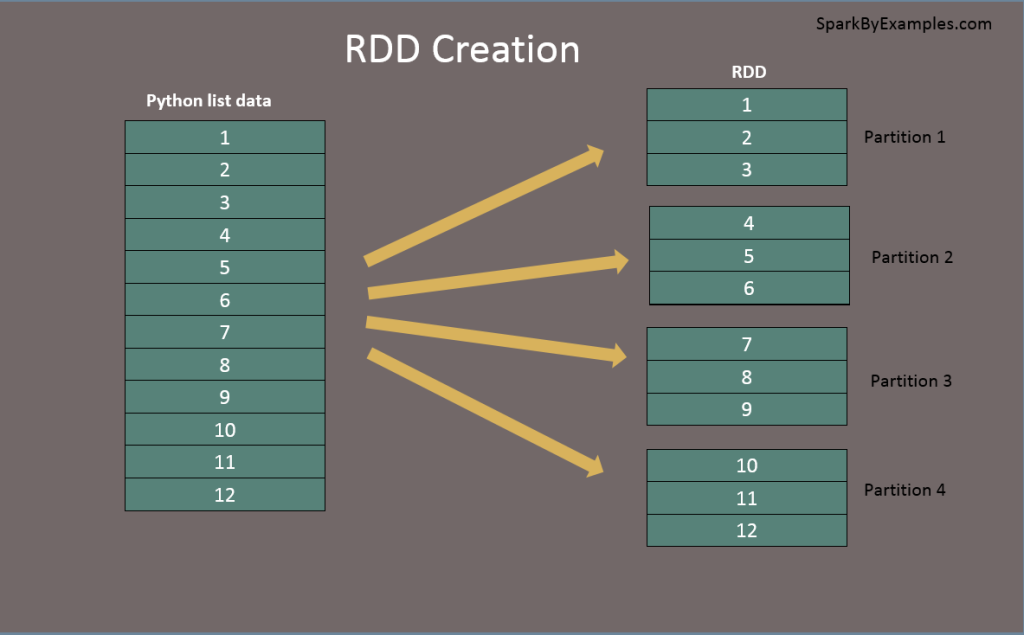

In [34]:
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9,10])

In [35]:
rdd=sparkContext.parallelize([1,2,3,4,5])
rddCollect = rdd.collect()
print("Number of Partitions: "+str(rdd.getNumPartitions()))
print("Action: First element: "+str(rdd.first()))
print(rddCollect)

Number of Partitions: 4
Action: First element: 1
[1, 2, 3, 4, 5]


In [40]:
lines = sc.textFile("file:///home/navin/Downloads/wordcount.txt")
print("Number of Partitions: "+str(lines.getNumPartitions()))
print("Action: First element: "+str(lines.first()))

print(lines.collect())

Number of Partitions: 2
Action: First element: hello world! hello welcome home welcome
['hello world! hello welcome home welcome', 'pyspar rdd one of the property is immutability', 'why rdd is immutable?', 'becasue data lineage every task derived based on privies task or edge']


In [62]:
rddfm=lines.flatMap(lambda line:(line[0],line)).collect()
print(rdd.collect())
print(rddfm)

[1, 2, 3, 4, 5]
['h', 'hello world! hello welcome home welcome', 'p', 'pyspar rdd one of the property is immutability', 'w', 'why rdd is immutable?', 'b', 'becasue data lineage every task derived based on privies task or edge']


In [64]:
print(type(lines))
print(type(rdd))

<class 'pyspark.rdd.RDD'>
<class 'pyspark.rdd.RDD'>


In [ ]:
print(lines.flatMap(lambda line:(line[0],line)).collect()) 